#**Deep Learning and Data Augmentation-Based Computer Vision Technology for Detecting Wind Power Turbines Systems from Satellite Images**

**C. Image datasets**

The three architectures discussed above will be trained on the high-resolution turbine patches dataset obtained from Airbus. The Airbus dataset is obtained from the SPOT satellite images over wind turbine plants (https://www.intelligence-airbusds.com/en/8693- spot-67, [accessed 14th October 2022]). The location of the wind turbines is extracted from the OpenStreetMap.

The data is made up of extracts of 128 by 128 pixels wind turbine images already pre-processed and tagged targets, and extracts of the same size without wind turbines also pre-processed and tagged background. The size of each satellite image is compatible with a typical size of a wind turbine. That is, when the pixel size of 128 by 128 of each satellite image is multiplied by its resolution of 1.5 meters, the resulting 192 meters represents the wind turbine satellite image data on the ground.

The split for training and validation set has already been done to ensure that the percentage of targets and background is identical.

**First Mount the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Check if GPU is connected and display its Details**

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Dec 21 21:14:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Download and Import Libraries and Dependencies**

In [ ]:
!pip install opendatasets
!pip install kaggle
!pip install segmentation-models-pytorch
!pip install torchsummary
!pip install -U albumentations
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir
!pip install segmentation_models
!pip install fastai
import opendatasets as od
import os
import os.path as osp
import sys
import pandas as pd
import networkx as nx
import numpy as np
from os import makedirs
import typing
import random
import pdb
import pandas
from time import time
import json
import re
import functools
import math
import datetime
from datetime import datetime
from datetime import date
import urllib.request
import inspect
import logging
import urllib
import zipfile
import copy
import tqdm
from tqdm.notebook import tqdm
import os.path as osp
from math import ceil
import IPython
import IPython.display
import requests
from collections import OrderedDict
from time import time
import PIL # image processing
from PIL import Image

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import colors
import matplotlib.lines as mlines
from matplotlib import pyplot
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
from matplotlib.pyplot import figure
#import sonnet as snt
import networkx as nx
import plotly.graph_objects as go
import io
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import (v_measure_score, homogeneity_score, completeness_score)
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from typing import Optional, List, Union
from collections import defaultdict
from itertools import repeat
from collections import abc as container_abcs
import matplotlib as mpl
import pytz
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python3.7/dist-packages/mpl_toolkits/')
from typing import Collection, Optional, Union
import folium
import pylab as plt
from ipywidgets.widgets import HTML
from tqdm import tqdm
import community as louvain
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.nn import Parameter
from torch.utils.tensorboard import SummaryWriter
from torch.nn import Sequential, Linear, ReLU
from torch.nn import Parameter, Module, Sigmoid
from torch.nn import Parameter as Param
from torch import Tensor
from IPython.display import Javascript
from torch.nn import Linear
from shutil import copyfile
from torch.utils.tensorboard import SummaryWriter
import folium
from tqdm import tqdm
import tqdm.notebook # progress bar for jupyter notebook
import time
from time import time
from zipfile import ZipFile
import shutil

from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset , DataLoader
from torchvision import transforms as T
import torchvision
import torch.nn.functional as F
from torch.autograd import Variable

import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim
import torch.nn.modules.loss
import torch.nn.modules.normalization as norm

from PIL import Image
import cv2
import albumentations as A

from torchsummary import summary
import segmentation_models_pytorch as smp

import tensorflow as tf
from glob import glob
import cv2
from skimage.transform import AffineTransform, warp
from skimage import io, img_as_ubyte
from scipy.ndimage import rotate
from albumentations.augmentations.crops.transforms import CropNonEmptyMaskIfExists, RandomCrop
import albumentations as A
import skimage.io
import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

import tensorflow.keras as keras

tf.config.run_functions_eagerly(True)

from fastai import *
from fastai.torch_basics import *
from fastai.data.all import *
from fastai.vision.all import *
from fastai.basics import *

device =torch.device("cuda" if torch.cuda.is_available() else "cpu")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 6.5 MB/s 
     |████████████████████████████████| 58 kB 6.6 MB/s 
     |████████████████████████████████| 376 kB 28.5 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=691d48e89d5404cf08f913ee4a99926705dfb09d8cc48d57c7fac9b1b8501a18
  Stored in directory: /root/.cache/pip/wheels/84/b9/90/25a0195cf95fb5533db96f1c77ea3f296b7cc86ae8ae48e3dc
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60966 sha256=d0906f4b7ac39b515a7dd7e334daadab39eab0c50d253769a60106cf1b143c28
  Stored in directory: /root/.cache/pip/wheels/ed/fa/b9/5c82b59d905f95542a192

**Obtain the AIRBUS SPOT satellites images over wind turbines Dataset from kaggle website:**


In [ ]:
os.environ['KAGGLE_USERNAME'] = "edgariyasele" # username from the json file
os.environ['KAGGLE_KEY'] = "" # key from the json file

!kaggle datasets download -d airbusgeo/airbus-wind-turbines-patches

100% 1.01G/1.01G [00:49<00:00, 24.0MB/s]
100% 1.01G/1.01G [00:49<00:00, 21.9MB/s]


**Unzip the downloaded data:**


In [ ]:
zf = ZipFile('/content/airbus-wind-turbines-patches.zip', 'r')
zf.extractall('/content')
zf.close()

**Exploratory Data Analysis (EDA) - Training Dataset**

Define the following functions:

a. Function to parse a folder and store filenames in a DataFrame

b. Function to stack together WIDTH * HEIGHT images - Patchwork

  0%|          | 0/154942 [00:00<?, ?it/s]

Total number of train targets images (128x128px): 154942
                                                         filename  train  \
0  /content/train/target/101fee2c-30d3-428a-a93d-e62c63b92562.jpg   True   
1  /content/train/target/07881212-fbb2-49c0-b9e5-e72bc9fa9687.jpg   True   
2  /content/train/target/0d53758b-1e64-4638-ac89-3cbf53b5b098.jpg   True   
3  /content/train/target/4939a988-1486-47ad-ad46-11d46cd2c554.jpg   True   
4  /content/train/target/eb67ba42-8446-497d-aaf0-8b5863209dff.jpg   True   
5  /content/train/target/72818923-fe68-46b9-a734-f7d5d56fbe06.jpg   True   
6  /content/train/target/98c3db54-c6ed-452f-824a-f744f102c6a0.jpg   True   
7  /content/train/target/e68e1147-7271-4519-a061-153e1f833c06.jpg   True   
8  /content/train/target/0390583e-13bc-4c4f-a13a-415b0792d9ab.jpg   True   
9  /content/train/target/35c3fc61-d798-4fdc-96f0-b6494d3cbac0.jpg   True   

   label  
0      1  
1      1  
2      1  
3      1  
4      1  
5      1  
6      1  
7      1  
8      

  0%|          | 0/202565 [00:00<?, ?it/s]

Total number of train background images (128x128px): 202565
                                                             filename  train  \
0  /content/train/background/d546af23-4b4a-4bf3-867b-815641b1b936.jpg   True   
1  /content/train/background/13484616-a296-4fa1-a2fb-052694523457.jpg   True   
2  /content/train/background/fb8c8f0a-6c4d-463f-b0b9-e589edaee878.jpg   True   
3  /content/train/background/3c58e983-c69a-4748-8c97-402dbe9a34c9.jpg   True   
4  /content/train/background/6d1bbb71-f775-43d9-ac8c-d00c5c79b82a.jpg   True   
5  /content/train/background/4dd6778a-9482-461f-a6b3-85d23d98f71b.jpg   True   
6  /content/train/background/63341f2e-9664-4614-ba00-d01525d24f84.jpg   True   
7  /content/train/background/0bb7537a-8b1d-4eb1-a82e-8cd000b29102.jpg   True   
8  /content/train/background/6b479a7e-e504-4eb2-aa5b-36fd2e52db08.jpg   True   
9  /content/train/background/8b0a5f49-1228-4c8d-845f-83857b825824.jpg   True   

   label  
0      0  
1      0  
2      0  
3      0  
4   

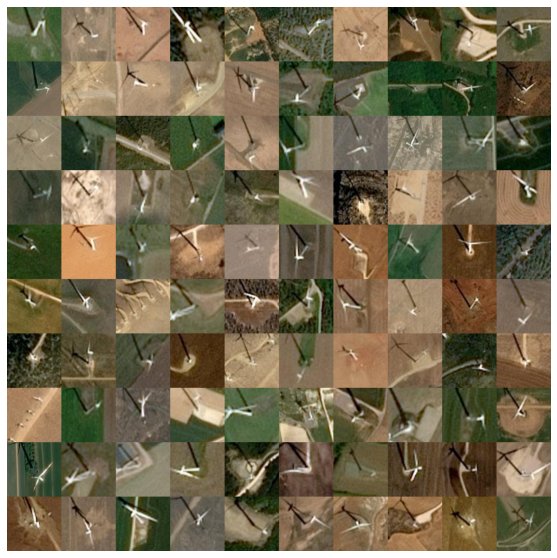

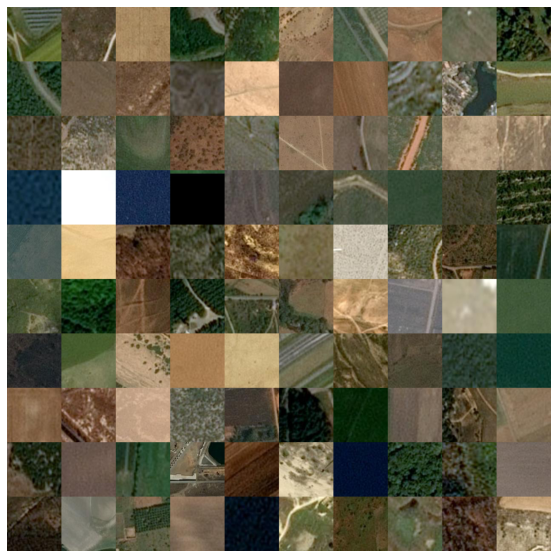

In [ ]:
IMG_MODE = 'RGB'
IMG_SIDE = 128

def parseFolder(folder, ext):
    filelist = os.listdir(folder)
    imgfiles = []
    for i, file in tqdm.notebook.tqdm(enumerate(filelist), total=len(filelist)):
        if file.endswith(ext):
            imgfiles.append(os.path.join(folder, file))

    # Calling DataFrame constructor on list
    df = pd.DataFrame(data=imgfiles, columns=["filename"])
    return df

def makePatchwork(files, width, height):
    patchwork = PIL.Image.new(IMG_MODE, (IMG_SIDE * width, IMG_SIDE * height))
    matrix = [[(files[y*height+x], x, y) for x in range(width)] for y in range(height)]
    patches = [item for sublist in matrix for item in sublist]
    for (f, x, y) in patches:
        patchwork.paste(PIL.Image.open(f), (x * IMG_SIDE, y * IMG_SIDE))
    return patchwork

# Upload the training target images
train_targets_folder = os.path.join('/content/train/target')

# parsing folder for JPEG files
train_targets = parseFolder(train_targets_folder, ".jpg")

# Set target (wind-turbines) for training
train_targets['train'] = True
train_targets['label'] = 1

print('=============================================================================')
print("Total number of train targets images (128x128px): {}".format(len(train_targets.index)))
print('=============================================================================')
print(train_targets.head(10))
print('=============================================================================')

# Upload the training background images
train_background_folder = os.path.join('/content/train/background')

# Parsing folder for JPEG files
train_background = parseFolder(train_background_folder, ".jpg")

# Set background for training
train_background['train'] = True
train_background['label'] = 0

print('=============================================================================')
print("Total number of train background images (128x128px): {}".format(len(train_background.index)))
print('============================================================================================')
print(train_background.head(10))
print('=============================================================================')

print("Average occurence of targets over background in train: {}%".format(round(len(train_targets.index) * 100 / len(train_background.index))))
print('=====================================================================================================================================================')

## Display some training target images:

# sample 100 target images from the train dataset
sampled = train_targets.sample(100)

# retrieve the corresponding filenames
files = [ i for i in sampled['filename'] ]

# make a patchwork
patchwork = makePatchwork(files, 10, 10)

# display it inline
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(patchwork)

# save the image
patchwork.save('targets_sampled.jpg')

#print('========================================================================')

## Display some training background images:

# sample 100 background images from the train dataset
sampled = train_background.sample(100)

# retrieve the corresponding filenames
files = [ i for i in sampled['filename'] ]

# make a patchwork
patchwork = makePatchwork(files, 10, 10)

# display it inline
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(patchwork)

# save the image
patchwork.save('background_sampled.jpg')
#print('======================================================================')

**Exploratory Data Analysis (EDA) - Validation/Testing Dataset**

  0%|          | 0/30991 [00:00<?, ?it/s]

Total number of Validation/Testing targets images (128x128px): 30991
                                                       filename
0  /content/val/target/71afe478-6135-4feb-97a0-2f9dd70157ef.jpg
1  /content/val/target/d8a04823-f583-4911-a079-b796e9f1693f.jpg
2  /content/val/target/572b1d1d-3d50-4cd0-8fb5-b87064a33753.jpg
3  /content/val/target/128afd6c-19a5-4a2a-9ac4-1f849e42dcb4.jpg
4  /content/val/target/a1458299-54f0-4b75-aaaa-a9a92066ff35.jpg
5  /content/val/target/fb35a203-97ff-4e70-9566-de8b4439d516.jpg
6  /content/val/target/16859411-bfe5-41f4-a220-19867c1063ff.jpg
7  /content/val/target/e9c0e985-ac64-48ce-aea6-877144376538.jpg
8  /content/val/target/ab033fa5-8a23-492a-a66b-60b03a2f5983.jpg
9  /content/val/target/25eb9e6d-518f-450f-80c3-808db369ae62.jpg


  0%|          | 0/40513 [00:00<?, ?it/s]

Total number of Validation/Testing background images (128x128px): 40513
                                                           filename
0  /content/val/background/64796b51-902d-4eb3-848d-f850161dbecc.jpg
1  /content/val/background/d0f754dd-9426-478d-89fd-76091fb89ff2.jpg
2  /content/val/background/1451899b-9328-489c-a622-7b213bfbfac0.jpg
3  /content/val/background/e467bad2-3924-48ce-8bb5-855a2b6a4c8d.jpg
4  /content/val/background/952d6461-9e0f-416f-9dbd-39109b177a03.jpg
5  /content/val/background/1e156744-fa6e-4d25-9c9f-c74e6d89afcd.jpg
6  /content/val/background/47a99136-52f4-4c0f-b208-aab9b5206f78.jpg
7  /content/val/background/3c5e30c8-d8b4-4215-b26f-b47dde86b8e9.jpg
8  /content/val/background/81b1ca09-b0b1-4b01-ad29-b8d3b50d5900.jpg
9  /content/val/background/fa594eb8-ad4f-45f2-8358-b8d3b11fa353.jpg
Average occurence of targets over background in Validation/Testing: 15%


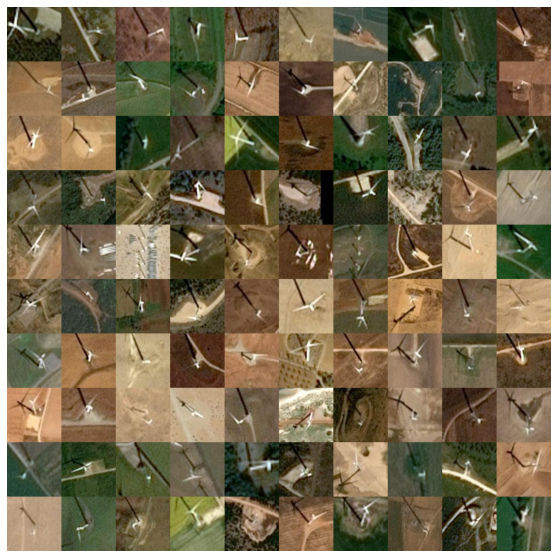

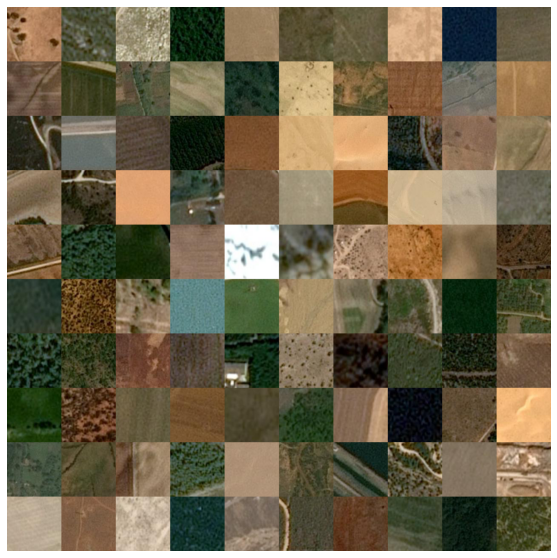

In [ ]:
# Upload the Validation/Testing target images
test_targets_folder = os.path.join('/content/val/target')

# parsing folder for JPEG files
test_targets = parseFolder(test_targets_folder, ".jpg")

print('=============================================================================')
print("Total number of Validation/Testing targets images (128x128px): {}".format(len(test_targets.index)))
print('=============================================================================')
print(test_targets.head(10))
print('=============================================================================')

# Upload the Validation/Testing background images
test_background_folder = os.path.join('/content/val/background')

# Parsing folder for JPEG files
test_background = parseFolder(test_background_folder, ".jpg")

print('=============================================================================')
print("Total number of Validation/Testing background images (128x128px): {}".format(len(test_background.index)))
print('============================================================================================')
print(test_background.head(10))
print('=============================================================================')

print("Average occurence of targets over background in Validation/Testing: {}%".format(round(len(test_targets.index) * 100 / len(train_background.index))))
print('=====================================================================================================================================================')

## Display some Validation/Testing target images:

# sample 100 target images from the Validation/Testing dataset
sampled = test_targets.sample(100)

# retrieve the corresponding filenames
files = [ i for i in sampled['filename'] ]

# make a patchwork
patchwork = makePatchwork(files, 10, 10)

# display it inline
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(patchwork)

# save the image
patchwork.save('targets_test_sampled.jpg')

#print('========================================================================')

## Display some Validation/Testing background images:

# sample 100 background images from the Validation/Testing dataset
sampled = test_background.sample(100)

# retrieve the corresponding filenames
files = [ i for i in sampled['filename'] ]

# make a patchwork
patchwork = makePatchwork(files, 10, 10)

# display it inline
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(patchwork)

# save the image
patchwork.save('background_test_sampled.jpg')
#print('======================================================================')

**D. Model Development**

In this study the Python programming language along with the PyTorch Deep Learning framework are chosen for the task of implementing the three Deep Learning architectures to detect wind power turbine systems. This choice is premised on the many advantages the PyTorch library has over similar framework. These include ability to build computation graph during runtime, simpler ways to interface with the Python code, GPU parallel computation capability, and the provision of data loading facilities.

Following the theoretical study, we begin with the initial definition of the three architectures, as well as the experiment of loading a pretrained version of the architectures. We also replace the architecture's fully connected layers and fine tuned them to suit our image dataset for the task of classification. The study image dataset is obtained from Airbus' high-resolution turbine patches dataset. A training pipeline is built according to PyTorch's guidelines to efficiently process the data.

**D.1 Building the data pipeline**

Following the PyTorch documentation, which allows building tensors for the minibatches used automatically during training, we begin by building a Dataset class. This class implements three methods. The first is the init method that represents the class' constructor. The second method is the getitem method which loads a single (input, label) pair from the disk and performs whichever preprocessing the data requires. Finally, the method length must be provided, which is supposed to return an integer describing the full length of the dataset. Thereafter, the PyTorch's DataLoader class is instantiated. This class is designed to take a Dataset instance, a batch size, and a boolean value indicating whether to shuffle the data. It is also designed such that we can iterate over it, and at every iteration, the DataLoader returns a pair of tensors containg the full input and ground truth minibatches. The training loop is also included. This loop consist of the optimizer object such as the Adam optimizer or the Stochastic Gradient Descent (SGD) optimiser. The optimizer is designed for gradient computing and updating the parameters.

With the above processes and methods in place, it is then possible to forward pass the training image dataset through the architectures, obtain their predictions, and then compute the loss using PyTorch's loss function. The backward() method is provided by the error fuction included also in the training loop. It assesses the error and prompts the optimizer to compute the parameters' gradient. Also within the training loop is the PyTorch's optimizer.step() method. It allows all weights on the architectures based on the computed gradients to be updated.

**Create a DataBlock which will read the images from a folder, get the labels from the folder names and make a random split of 20%**

In [ ]:
wt = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label)

**Obtain the Training and Validation Dataset**

In [ ]:
x_train_dir = '/content/train/background'
y_train_dir = '/content/train/target'

x_valid_dir = '/content/val/background'
y_valid_dir = '/content/val/target'

**Define Visualization and Normalization Functions**

In [ ]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

**Create the Dataset Class**

In [ ]:
ids = os.listdir(x_train_dir)
images_fps = [os.path.join(x_train_dir, image_id) for image_id in ids]

image = cv2.imread(images_fps)
image

TypeError: ignored

In [ ]:
class Dataset:

    CLASSES = ['nodetect', 'es']

    def __init__(self, images_dir, masks_dir, classes=None, augmentation=None, preprocessing=None):
        self.ids = os.listdir(images_dir)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]

        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]

        self.augmentation = augmentation
        self.preprocessing = preprocessing

    def __getitem__(self, i):

        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.masks_fps[i])
        mask = mask/mask.max()

        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')

        if mask.shape[-1] != 1:
            background = 1 - mask.sum(axis=-1, keepdims=True)
            mask = np.concatenate((mask, background), axis=-1)

        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        return image, mask

    def __len__(self):
        return len(self.ids)

**Create the DataLoader Class**

In [ ]:
class Dataloder(keras.utils.Sequence):
    """Load data from dataset and form batches

    Args:
        dataset: instance of Dataset class for image loading and preprocessing.
        batch_size: Integet number of images in batch.
        shuffle: Boolean, if `True` shuffle image indexes each epoch.
    """

    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

        self.on_epoch_end()

    def __getitem__(self, i):

        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.stack(samples, axis=0) for samples in zip(*data)]

        return batch[0], batch[1]

    def __len__(self):
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

dataset = Dataset(x_train_dir, y_train_dir, classes=['NoDetect', 'ES'])

**Visualize some images**

In [ ]:
image, mask = dataset[10]
visualize(image=image, substation_mask=mask[..., 1].squeeze())

AttributeError: ignored

In [ ]:
def dense_target(tar: np.ndarray):
    classes =np.unique(tar)
    dummy= np.zeros_like(tar)
    for idx , value in enumerate(classes):
        mask = np.where(tar == value)
        dummy[mask] = idx
    return dummy

class SegData(Dataset):

  def __init__(self , image_path , target_path , X , mean , std , transform =None , test=False):
    self.image_path = image_path
    self.target_path = target_path
    self.X = X
    self.transform =transform
    self.mean = mean
    self.std = std
    self.test =test

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    img = cv2.cvtColor(cv2.imread(self.image_path + self.X[idx] + '.png') , cv2.COLOR_BGR2RGB)
    target = cv2.imread(self.target_path + self.X[idx] + '.png' , cv2.IMREAD_GRAYSCALE)
    kernel_sharp = np.array(([-2, -2, -2], [-2, 17, -2], [-2, -2, -2]), dtype='int')
    img = cv2.filter2D(img, -1, kernel_sharp)
    target = cv2.filter2D(target, -1, kernel_sharp)
    img = cv2.resize(img, (512 , 512) , interpolation = cv2.INTER_NEAREST)
    target = cv2.resize(target , (512 , 512), interpolation = cv2.INTER_NEAREST)
    target = np.where( target > 0, 255, 0)

    if self.transform is not None:
      aug = self.transform(image = img , target = target )
      img = Image.fromarray(aug['image'])
      target = aug['target']

    if self.transform is None:
      img = Image.fromarray(img)

    t = T.Compose([T.ToTensor() , T.Normalize(self.mean , self.std)])

    if self.test is False:
      img = t(img)
    target = dense_target(target)
    target = torch.from_numpy(target).long()
    return img ,target

mean = [0.485 ,0.456 ,0.406]
std = [0.229 , 0.224 , 0.225]

train_set = SegData(images, targets, X_train , mean, std)
val_set = SegData(images , targets , X_val , mean , std)

batch_size = 4
train_loader= DataLoader(train_set , batch_size= batch_size , shuffle =True)
val_loader = DataLoader(val_set , batch_size = batch_size , shuffle =True)

x, y =next(iter(train_loader))

print('===============================================================')
print(f' x_train = shape : {x.shape} ; type :{x.dtype}')
print(f' x_train = min : {x.min()} ; max : {x.max()}')
print(f' y_train = shape: {y.shape}; class : {y.unique()}; type: {y.dtype}')
print('===============================================================')

x, y =next(iter(val_loader))

print('===============================================================')
print(f' x_val = shape : {x.shape} ; type :{x.dtype}')
print(f' x_val = min : {x.min()} ; max : {x.max()}')
print(f' y_val = shape: {y.shape}; class : {y.unique()}; type: {y.dtype}')
print('===============================================================')

error: ignored

In [ ]:
# Put the Background datasets together as images
x_train_dir = os.path.join('/content/train/background')
x_valid_dir = os.path.join('/content/val/background')

# Put the Target datasets together as targets
y_train_dir = os.path.join('/content/train/target')
y_valid_dir = os.path.join('/content/val/target')

# Function to create new folder if not exists
def make_new_folder(folder_name, parent_folder):

    # Path
    path = os.path.join(parent_folder, folder_name)

    # Create the folder
    # 'new_folder' in
    # parent_folder
    try:
        # mode of the folder
        mode = 0o777

        # Create folder
        os.mkdir(path, mode)
    except OSError as error:
        print(error)

# current folder path
current_folder = os.getcwd()

# list of Background folders to be merged
list_dir = [x_train_dir, x_valid_dir]

# enumerate on list_dir to get the
# content of all the folders ans store it in a dictionary
image = {}
for index, val in enumerate(list_dir):
    path = os.path.join(current_folder, val)
    image[ list_dir[index] ] = os.listdir(path)

# folder in which all the content will
# be merged
merge_folder = "images"

# merge_folder path - current_folder
# + merge_folder
merge_folder_path = os.path.join(current_folder, merge_folder)

# create merge_folder if not exists
make_new_folder(merge_folder, current_folder)

# loop through the list of folders
for sub_dir in image:

    # loop through the contents of the
    # list of folders
    for contents in image[sub_dir]:

        # make the path of the content to move
        path_to_content = sub_dir + "/" + contents

        # make the path with the current folder
        dir_to_move = os.path.join(current_folder, path_to_content )

        # move the file
        shutil.move(dir_to_move, merge_folder_path)

count = 0
for key, value in image.items():
    if isinstance(value, list):
          count += len(value)

print("Image dataset is: ", count)

with open('/content/images.txt', 'w') as data_image:
      data_image.write(str(image))

# list of Target folders to be merged
list_dir = [y_train_dir, y_valid_dir]

# enumerate on list_dir to get the
# content of all the folders ans store it in a dictionary
target = {}
for index, val in enumerate(list_dir):
    path = os.path.join(current_folder, val)
    target[ list_dir[index] ] = os.listdir(path)

# folder in which all the content will
# be merged
merge_folder = "targets"

# merge_folder path - current_folder
# + merge_folder
merge_folder_path = os.path.join(current_folder, merge_folder)

# create merge_folder if not exists
make_new_folder(merge_folder, current_folder)

# loop through the list of folders
for sub_dir in target:

    # loop through the contents of the
    # list of folders
    for contents in target[sub_dir]:

        # make the path of the content to move
        path_to_content = sub_dir + "/" + contents

        # make the path with the current folder
        dir_to_move = os.path.join(current_folder, path_to_content )

        # move the file
        shutil.move(dir_to_move, merge_folder_path)

count = 0
for key, value in target.items():
    if isinstance(value, list):
          count += len(value)
print("Target dataset is: ", count)

with open('/content/targets.txt', 'w') as data_target:
      data_target.write(str(target))

n_classes = 2

def _df_():
  name = []
  for dirname ,_ , filenames in os.walk('/content/images.txt'):
    for filename in filenames:
      name.append(filename.split('.')[0])

    return pd.DataFrame({'id':name} , index = np.arange(0, len(name)))

df = _df_()
#print(len(df))

[Errno 17] File exists: '/content/images'
Image dataset is:  0


IsADirectoryError: ignored

In [ ]:
df

**Test**

In [ ]:
zf = ZipFile('/content/Data_ML-20221221T110434Z-001.zip', 'r')
zf.extractall('/content')
zf.close()

In [ ]:
PATH = './Data_ML/target_feature_AOI'
EXT = "*.csv"
all_csv_files = []
for path, subdir, files in os.walk(PATH):
    for file in glob(os.path.join(path, EXT)):
        all_csv_files.append(file)

for path in all_csv_files:
    img = np.zeros((750,750))
    csv = pd.read_csv(path)
    filename= path.split('/')[4].split('.')[0]
    filepath = os.path.join('./Data_ML/target', filename+'.jpg')
# img = cv2.imread('./Data_ML-20210718T153802Z-001/Data_ML/image_chips/1J01.jpg')
# print(img.shape)
    for i in range(csv.shape[0]):
        pro = (csv['WKT'][i].split('MULTIPOLYGON')[1].split('(')[3].split(')')[0].split(','))
        pro = str(pro).replace('-',',').replace('[','').replace(']','').replace('\'','')
        pro = pro.split(',')
        pro = list( map(float, pro) )
        pro= np.array(pro,np.int32).reshape((-1,1,2))
        img = cv2.fillPoly(img, [pro],
                        color = (235,0,0))
    cv2.imwrite(filepath, img)

IndexError: ignored

In [ ]:
filepath

'/content/Data_ML/target/J854.jpg'

In [ ]:
os.mkdir('./AUG_DATA')
os.mkdir('./AUG_DATA/train')
os.mkdir('./AUG_DATA/masks')

# AUGUMENTATION
IMAGES_TO_GENERATE = 10

images_path = '/content/Data_ML/image_chips'
mask_path = '/content/Data_ML/target'

img_aug_path = './AUG_DATA/train'
mask_aug_path = './AUG_DATA/masks'

images= []
masks = []

for im in os.listdir(images_path):
    images.append(os.path.join(images_path,im))
for msk in os.listdir(mask_path):
    masks.append(os.path.join(mask_path,msk))

aug = A.Compose([
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=1),
    A.Transpose(p=1),
    A.GridDistortion(p=1),
    CropNonEmptyMaskIfExists(p=0.3,height=512,width=512),
    A.geometric.rotate.Rotate (limit=90, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
])

i=1

while i<=IMAGES_TO_GENERATE:
    number= random.randint(0,len(images)-1)
    image = images[number]
    mask = masks[number]
    print(image,mask)
    original_image =io.imread(image)
    original_mask =io.imread(mask)
    augmented = aug(image=original_image,mask=original_mask)
    transformed_image = augmented['image']
    transformed_mask = augmented['mask']

    new_image_path ='%s/%s.png'%(img_aug_path,i)
    new_mask_path ='%s/%s.png'%(mask_aug_path,i)
    print(new_image_path)
    io.imsave(new_image_path,transformed_image)
    io.imsave(new_mask_path,transformed_mask)
    i=i+1

FileNotFoundError: ignored